In [5]:
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import scipy.optimize

import minkowski_tools as mt

In [12]:
import importlib
importlib.reload(mt)

<module 'minkowski_tools' from '/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py'>

In [3]:
n=4000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

In [4]:
connections = mt.get_connections(points, pval=2, radius=0.05)

In [6]:
# connections = get_connections

def perc_thresh1(connections):
    previous = {}

    for ind in [n-2, n-1]:
        previous[ind] = {ind}

    if connections[n-1, n-2]:
        previous[n-1].add(n-2)

    no_points = 2

    
    while (n-2) not in previous[n-1] and no_points<n:
        
        no_points += 1
        
        upto = n-no_points
        previous[upto] = {upto}

        for node_to_current in np.nonzero(connections[n-no_points, n-no_points:])[0]:
            previous[upto].update(previous[upto + node_to_current])

        nodes_from = set(upto + np.nonzero(connections[upto:, upto])[0])

        for other_node in range(upto, n):
            if previous[other_node].intersection(nodes_from):
                previous[other_node].update(previous[upto])

    return no_points

# if (n-2) in previous[n-1]:
#     return no_points

# else:
#     print('Diagonal not connected.')
#     return False

# no_points = perc_thresh1(connections)
# mt.shortest_path(mt.get_connections(points[:, n-no_points:], pval=2, radius=.05)), no_points

In [694]:
# def perc_thresh2(connections):

#this doesnnt work, doesn't update the searrch recursively
#maybe have a beofre and after, see what does

def perc_thresh2(connections):
    before_after = np.identity(len(connections))

    if connections[n-1, n-2]:
        before_after[n-1, n-2] = 1

    no_points = 2
    use = connections.astype(bool).astype(int)

    while (before_after[n-2, n-1]==0) and no_points<n:

        no_points += 1
        upto = n-no_points

        for v in np.nonzero(connections[upto:, upto])[0]:
            before_after[upto, :] += before_after[v+upto, :]

        for v in np.nonzero(connections[upto, upto:])[0]:
            before_after[v+upto, :] += before_after[upto, :]

    return no_points

no_points = perc_thresh2(connections)
mt.shortest_path(mt.get_connections(points[:, n-no_points:], pval=2, radius=.05)), no_points

(([3999, 3375, 3195, 2394, 3998], 1.414217714358471), 4000)

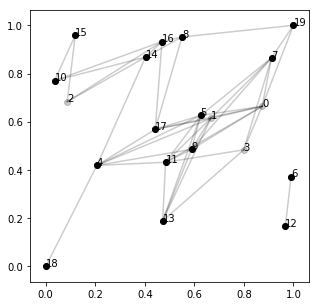

In [632]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(*points[:, n-no_points:], c='k')
plt.scatter(*points, c='k', alpha=.2)

perc_path1 = np.array([points[:, i+n-no_points] for i in mt.shortest_path(mt.get_connections(points[:, n-no_points:], pval=2, radius=1))[0]]).transpose()
perc_path2 = np.array([points[:, i+n-no_points] for i in mt.longest_path(mt.get_connections(points[:, n-no_points:], pval=2, radius=.2))[0]]).transpose()

# print(perc_path1)

# mt.plot_path_points(ax, points, [perc_path1, perc_path2], ['Shortest', 'Longest'])
# mt.plot_path_points(ax, points, [perc_path1], ['Shortest'])

# plt.scatter(*points[:, n-no_points], c='k')
annotations = [plt.annotate(i, (points[0, i], points[1, i])) for i in range(n)]


for i in range(n):
    for j in range(n):
        if connections[i, j]:
            plt.plot([points[0, i], points[0, j]], [points[1, i], points[1, j]], 'k', alpha=0.2)
# xs = np.arange(0, .5, .001)
# plt.fill_between(xs, np.sqrt(.5*.5-xs*xs))

In [675]:
%timeit perc_thresh1(connections)

966 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [676]:
%timeit perc_thresh2(connections)

388 ms ± 5.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [693]:
perc_thresh1(connections), perc_thresh2(connections)

(1876, 4000)

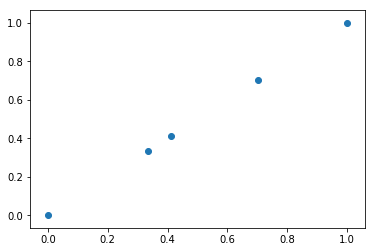

In [691]:
plt.scatter(*points[:, 4000-1876+np.array([1875, 1251, 1071, 270, 1874])])

In [718]:
before_after = np.identity(len(connections))

if connections[n-1, n-2]:
    before_after[n-1, n-2] = 1

no_points = 2
use = connections.astype(bool).astype(int)

while (before_after[n-1, n-2]==0) and no_points<n:

    no_points += 1
    upto = n-no_points

    for v in np.nonzero(connections[upto, upto:])[0]: #to the current node
        before_after[upto, :] += before_after[v+upto, :]

    for v in np.nonzero(connections[upto:, upto])[0]: #from the current node
        before_after[v+upto, :] += before_after[upto, :]

In [719]:
no_points

4000

In [697]:
before_after[-5:, -5:].astype(bool).astype(int)

array([[1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [704]:
np.sum(connections, axis=0)

array([0.04616648, 0.30691713, 0.2969935 , ..., 0.2071728 , 0.27204753,
       0.        ])

In [701]:
np.sum(connections[-3:, :], axis=1)

array([0.22045223, 0.        , 0.20976212])

In [708]:
print(np.sum(connections[:, -1]))
connections[:, -1], connections[-2, :]

0.0


(array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]))

In [714]:
a = np.arange(4).reshape((2, 2))
a[1, 0]

2

In [715]:
a

array([[0, 1],
       [2, 3]])

In [733]:
quick_data = []

for i in range(10000):
    n=1000
    rand_points = np.random.uniform(size=(2, n-2))
    edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
    points = np.concatenate((rand_points, edge_points), axis=1)
    connections = mt.get_connections(points, pval=2, radius=0.1)
    no_points = perc_thresh1(connections)
    quick_data.append(no_points)

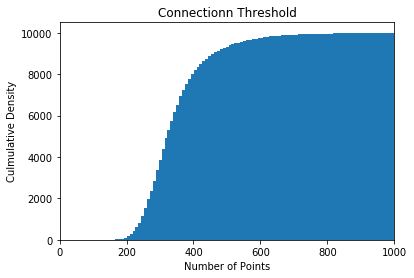

In [737]:
plt.hist(quick_data, cumulative=True, bins=100)
plt.gca().set(xlim=(0, 1000), xlabel='Number of Points', ylabel='Culmulative Density', title='Connectionn Threshold')
# plt.savefig('img/pval2r05.pdf')

(array([  1.,   1.,   3.,   7.,  11.,  10.,  21.,  46.,  81.,  99., 166.,
        187., 201., 325., 394., 406., 414., 474., 509., 476., 538., 522.,
        399., 429., 441., 371., 388., 317., 294., 232., 222., 208., 141.,
        165., 148., 107., 118.,  82., 109.,  73.,  83.,  51.,  64.,  68.,
         60.,  35.,  29.,  49.,  21.,  36.,  36.,  22.,  27.,  26.,  18.,
         23.,  22.,  17.,  10.,  17.,   8.,   8.,  12.,   6.,   9.,   6.,
         13.,   3.,   9.,   6.,   3.,   4.,   2.,   3.,   8.,   3.,   4.,
          3.,   1.,   5.,   3.,   2.,   1.,   2.,   2.,   1.,   0.,   2.,
          2.,   1.,   0.,   1.,   2.,   1.,   2.,   1.,   1.,   0.,   1.,
          9.]),
 array([ 131.  ,  139.69,  148.38,  157.07,  165.76,  174.45,  183.14,
         191.83,  200.52,  209.21,  217.9 ,  226.59,  235.28,  243.97,
         252.66,  261.35,  270.04,  278.73,  287.42,  296.11,  304.8 ,
         313.49,  322.18,  330.87,  339.56,  348.25,  356.94,  365.63,
         374.32,  383.01,  391.7 ,

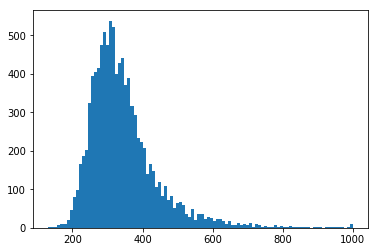

In [739]:
plt.hist(quick_data, bins=100)

In [7]:
%timeit perc_thresh1(connections)

171 ms ± 3.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
perc_thresh1(connections)

1215

In [ ]:
generate conns
see if percolate?
if percolates, suweeeet
if doesnt percolate, increase r and recalculate the conns
find additional points and see what effect they have, i.e. do they makee it percolate? can we 'update somethinng here?'


In [115]:
# finding threshold
def smallest_r(points,  pval):

    N = points.shape[0]
    n = points.shape[1]

    meshed = [np.meshgrid(points[i, :], points[i, :]) for i in range(N)]
    diffs = np.array([cols-rows for rows, cols in meshed])
    box_cube_condition = (diffs > 0).all(axis=0)
    distsp = (diffs**pval).sum(axis=0)

    nolimit_connections = (distsp**(1/pval))*box_cube_condition
    
#     print(nolimit_connections)
    
    maxes, prev = {}, {}

    for i in range(n):
        maxes[i] = np.inf
    maxes[n-2] = 0
    
#     print(mt.topo_sort(nolimit_connections))
    for u in mt.topo_sort(nolimit_connections): #can replace the top sort with points sorting
        for v in np.nonzero(nolimit_connections[:, u])[0]:

            alt = max(maxes[u], nolimit_connections[v, u])
            
#             print(f'u={u}, v={v}, maxes[u]={maxes[u]}, maxes[v]={maxes[v]}, alt={alt}, nolimit_connections[v, u]={nolimit_connections[v, u]}')
            
            if alt < maxes[v]:
#                 print (f'Replace with alt={alt}')
                maxes[v] = alt
                prev[v] = u

    u = n-1

    path=[]
    path.append(u)
    
#     print(prev)
#     print(maxes)
    
    if prev.get(u) is not None:
            while u != n-2:
                u = prev[u]
                path.append(u)

            return path, maxes[n-1]

    else:
            return [], 0.0

In [122]:
n=1000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

smallest_r(points, pval=2)

([999,
  305,
  586,
  357,
  382,
  98,
  805,
  12,
  230,
  662,
  997,
  240,
  564,
  958,
  13,
  644,
  79,
  821,
  214,
  511,
  964,
  939,
  270,
  784,
  421,
  475,
  611,
  912,
  265,
  178,
  39,
  942,
  751,
  807,
  4,
  813,
  162,
  733,
  998],
 0.056925707182883714)

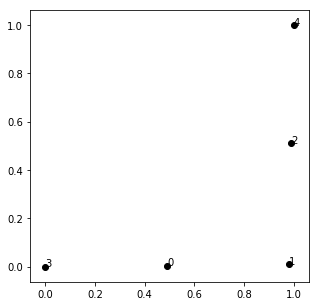

In [119]:
# n=4000
# rand_points = np.random.uniform(size=(2, n-2))
# edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
# points = np.concatenate((rand_points, edge_points), axis=1)

test_points = np.array([[0.49, .98, .99, 0.0, 1.0],[0.005, 0.01, 0.51, 0.0, 1.0]])

fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(*test_points, c='k')

# print(perc_path1)

# mt.plot_path_points(ax, points, [perc_path1, perc_path2], ['Shortest', 'Longest'])
# mt.plot_path_points(ax, points, [perc_path1], ['Shortest'])

# plt.scatter(*points[:, n-no_points], c='k')
annotations = [plt.annotate(i, (test_points[0, i], test_points[1, i])) for i in range(test_points.shape[1])]


# for i in range(n):
#     for j in range(n):
#         if connections[i, j]:
#             plt.plot([test_points[0, i], test_points[0, j]], [test_points[1, i], test_points[1, j]], 'k', alpha=0.2)
# xs = np.arange(0, .5, .001)
# plt.fill_between(xs, np.sqrt(.5*.5-xs*xs))

In [42]:
no

(2, 5)

In [113]:
nolimit_connections = np.array([[0.,0.,0.,0.,0.,],
 [0.,0.,0.,0.,0.,],
 [0.,0.,0.,0.,0.,],
 [1.11803399,0.70710678,0.,0.,0.],
 [1.41421356,1.11803399,0.,0.,0.]])

In [97]:
nolimit_connections[4, 0]

1.41421356

In [109]:
0.345 < np.inf

True

In [4]:
n=1000
trials = 100
all_results = {}
results = []
for i in range(trials):
    
    rand_points = np.random.uniform(size=(2, n-2))
    edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
    points = np.concatenate((rand_points, edge_points), axis=1)

    results.append(smallest_r(points, pval=2)[1])
    

NameError: name 'smallest_r' is not defined

In [126]:
results

[0.06291648053509508,
 0.05367561352218865,
 0.04920456146602388,
 0.06119039369314227,
 0.056488336733767956,
 0.05018810682919545,
 0.058127464303187715,
 0.0560633643174598,
 0.057618589072505354,
 0.05182884012922266,
 0.0616141871061359,
 0.05996004169613664,
 0.07052414690109254,
 0.06183558422346722,
 0.07097004728253282,
 0.07156160578395222,
 0.06016094741595061,
 0.05820019649652294,
 0.052327374727652164,
 0.05198764667371146,
 0.05660502376478604,
 0.05818589638984753,
 0.06064444598151545,
 0.06318969094672482,
 0.07246915382109442,
 0.05086225726200443,
 0.0661250468782917,
 0.05578891222486572,
 0.05730981666271527,
 0.05434808720643943,
 0.05418543158898637,
 0.07888642575583857,
 0.06066322172742691,
 0.057053424589257246,
 0.05850613224629501,
 0.0727696880641717,
 0.06322260109233378,
 0.08313847322279842,
 0.059267924673824156,
 0.058332986048504724,
 0.0544073238430542,
 0.06732410690833551,
 0.07214852367222224,
 0.060544365518730554,
 0.068085140201763,
 0.057497

(array([  2.,   3.,   6.,   6.,  10.,  13.,  16.,  21.,  25.,  27.,  31.,
         37.,  39.,  46.,  54.,  56.,  58.,  64.,  69.,  72.,  74.,  75.,
         79.,  81.,  81.,  82.,  83.,  84.,  84.,  85.,  86.,  86.,  86.,
         86.,  88.,  89.,  90.,  92.,  92.,  92.,  93.,  93.,  93.,  93.,
         94.,  94.,  94.,  95.,  95.,  96.,  96.,  97.,  97.,  97.,  98.,
         98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,
         98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,
         98.,  98.,  98.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,
         99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,
        100.]),
 array([0.04920456, 0.04982723, 0.0504499 , 0.05107257, 0.05169524,
        0.05231791, 0.05294058, 0.05356326, 0.05418593, 0.0548086 ,
        0.05543127, 0.05605394, 0.05667661, 0.05729928, 0.05792195,
        0.05854462, 0.05916729, 0.05978996, 0.06041263, 0.0610353 ,
        0.06165797, 0.06228064, 0.06290331, 0.

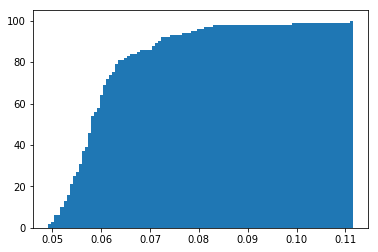

In [128]:
plt.hist(results,cumulative=True, bins=100)

In [134]:
mt.r1_area2D(2)*(.05**2)*n

1.9634950000000009

In [23]:
ns = [1000]
ps = [2]

mt.separate_perc_r(ns, ps, 'outputs/test_perc.txt', repeats=10)

True

In [22]:
import importlib
importlib.reload(mt)

<module 'minkowski_tools' from '/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py'>